<a href="https://colab.research.google.com/github/ilkianumbuk-code/java/blob/main/UTS_KECERDASAN_BUATAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total Biaya (Cost): 41
Panjang Jalur: 39
Jalur yang ditemukan: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (2, 5), (3, 5), (3, 6), (4, 6), (4, 7), (5, 7), (5, 8), (5, 9), (5, 10), (6, 10), (7, 10), (8, 10), (9, 10), (10, 10), (10, 11), (10, 12), (10, 13), (11, 13), (12, 13), (13, 13), (14, 13), (14, 14), (15, 14), (15, 15), (15, 16), (15, 17), (15, 18), (16, 18), (16, 19), (17, 19), (18, 19), (19, 19)]


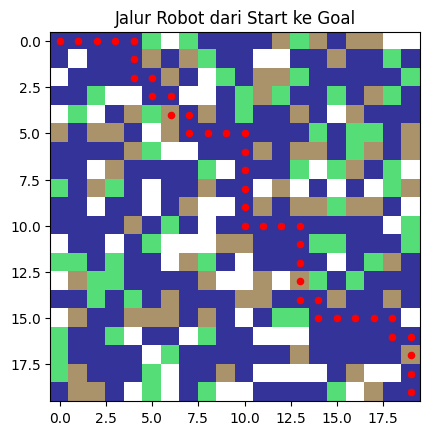

In [ ]:

# SISTEM NAVIGASI ROBOT DENGAN A*


import heapq
import numpy as np
import matplotlib.pyplot as plt

# 1. Buat peta grid 20x20
# 0 = jalan biasa, 1 = obstacle, 2 = jalur berdebu, 3 = jalur licin
grid = np.random.choice([0, 0, 0, 1, 2, 3], size=(20,20))
start = (0, 0)     # posisi awal
goal = (19, 19)    # posisi tujuan
grid[start] = 0
grid[goal] = 0

# 2. Fungsi heuristic (jarak antara titik sekarang dan tujuan)
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])  # Manhattan distance

# 3. Implementasi algoritma A*
def a_star(grid, start, goal):
    rows, cols = grid.shape
    # open_list menyimpan titik yang akan dikunjungi
    open_list = []
    heapq.heappush(open_list, (0 + heuristic(start, goal), 0, start, [start]))
    visited = set()

    while open_list:
        f, cost, current, path = heapq.heappop(open_list)

        # Jika sudah sampai di tujuan, kembalikan jalur dan biayanya
        if current == goal:
            return path, cost

        if current in visited:
            continue
        visited.add(current)

        # Cek semua arah (atas, bawah, kiri, kanan)
        for dx, dy in [(0,1), (0,-1), (1,0), (-1,0)]:
            x, y = current[0] + dx, current[1] + dy
            if 0 <= x < rows and 0 <= y < cols and grid[x][y] != 1:
                # Tambahkan cost sesuai jenis jalurnya
                new_cost = cost + (1 if grid[x][y] == 0 else grid[x][y])
                heapq.heappush(open_list, (
                    new_cost + heuristic((x, y), goal),
                    new_cost,
                    (x, y),
                    path + [(x, y)]
                ))
    return None, float('inf')  # jika tidak ada jalur

# 4. Jalankan algoritma
path, cost = a_star(grid, start, goal)
print("Total Biaya (Cost):", cost)
print("Panjang Jalur:", len(path))
print("Jalur yang ditemukan:", path)

# 5. Visualisasi hasil
plt.imshow(grid, cmap='terrain')
for (x, y) in path:
    plt.scatter(y, x, c='red', s=20)  # tampilkan jalur robot
plt.title("Jalur Robot dari Start ke Goal")
plt.show()





In [ ]:

# SISTEM PENJADWALAN KULIAH (CSP)


# 1. Data mata kuliah dan dosen
courses = {
    'MK1': 'Dosen_A', 'MK2': 'Dosen_B', 'MK3': 'Dosen_A', 'MK4': 'Dosen_B',
    'MK5': 'Dosen_C', 'MK6': 'Dosen_D', 'MK7': 'Dosen_C', 'MK8': 'Dosen_D'
}

# 2. Pasangan mata kuliah yang tidak boleh bentrok
conflicts = [
    ('MK1', 'MK2'), ('MK3', 'MK4'), ('MK5', 'MK6'),
    ('MK1', 'MK3'), ('MK2', 'MK5'), ('MK4', 'MK7')
]

# 3. Daftar slot waktu (1-8)
slots = list(range(1, 9))
schedule = {}

# 4. Fungsi pengecekan constraint
def is_consistent(course, slot):
    for c, s in schedule.items():
        if s == slot:  # slot sudah diisi MK lain
            return False
        if courses[c] == courses[course] and s == slot:  # dosen sama bentrok
            return False
        if (course, c) in conflicts or (c, course) in conflicts:  # mahasiswa bentrok
            if s == slot:
                return False
    return True

# 5. Fungsi Backtracking
def backtrack():
    if len(schedule) == len(courses):
        return True
    course = [c for c in courses if c not in schedule][0]
    for slot in slots:
        if is_consistent(course, slot):
            schedule[course] = slot
            if backtrack():
                return True
            del schedule[course]
    return False

# 6. Jalankan CSP
backtrack()

# 7. Tampilkan hasil akhir
print("=== Jadwal Akhir Mata Kuliah ===")
for mk, slot in schedule.items():
    day = "Senin" if slot <= 4 else "Selasa"
    time = ["08:00-10:00","10:00-12:00","13:00-15:00","15:00-17:00"][slot%4 - 1]
    print(f"{mk:<5} | {courses[mk]:<8} | {day:<6} | {time}")


=== Jadwal Akhir Mata Kuliah ===
MK1   | Dosen_A  | Senin  | 08:00-10:00
MK2   | Dosen_B  | Senin  | 10:00-12:00
MK3   | Dosen_A  | Senin  | 13:00-15:00
MK4   | Dosen_B  | Senin  | 15:00-17:00
MK5   | Dosen_C  | Selasa | 08:00-10:00
MK6   | Dosen_D  | Selasa | 10:00-12:00
MK7   | Dosen_C  | Selasa | 13:00-15:00
MK8   | Dosen_D  | Selasa | 15:00-17:00
